<a href="https://colab.research.google.com/github/sanhiitaa/customer-segmentation-rfm-analysis/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Using the above data, find useful insights about the customer purchasing history
that can be an added advantage for the online retailer.
2. Segment the customers based on their purchasing behavior

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

## Cleaning Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


1. The data has 8 columns, 3 float, 5 object type, and 360917 columns.

2. There seem to be null values present in the data, which warrants a need to search for duplicates as well.

In [ ]:
# checking for duplicates
df.duplicated().sum()

# treating duplicates
df=df.drop_duplicates()

In [ ]:
# checking for null values
(df.isnull().sum()/len(df))*100

# as we are going to perform behavioral analysis which has to do with purchase trends, the column CustomerID holds no importance.
# we will drop the column
# treating null values
df1=df.drop('CustomerID',axis=1)

In [ ]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   Country      536641 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 32.8+ MB


In [ ]:
# replacing null values in Description with 'no description'
df1=df1.fillna(value='no description')

In [ ]:
# exploring basic statistics
df1.describe()

,Quantity,UnitPrice
count,536641.000000,536641.000000
mean,9.620029,4.632656
std,219.130156,97.233118
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


- Both the `Quantity` and `UnitPrice` shows the minimum values to be negative (-80995.000000 and -11062.060000 respectively), which is simply not possible in the context of retail data. The smallest value these columns can hold is 0.

- We need to investigate what portion of the data do these negative values occupy in order to make a decision on how they should be treated.

In [ ]:
a=df1['Quantity']<0
b=df1['UnitPrice']<0
percent=(len(df1[a | b])/len(df1)*100)
print(f'The negative values in either columns (`Quantity` or `UnitPrice`) makes up {percent: .2f}% of the original data.')

The negative values in either columns (`Quantity` or `UnitPrice`) makes up  1.97% of the original data.


In [ ]:
# entries with negative values in the 'Quantity' column
df1[a].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,United Kingdom


In [ ]:
# entries with negative values in the 'UnitPrice' column
df1[b].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,United Kingdom


- The negative values in the two aforementioned columns make up a small portion (1.97%) of the original data and will have no contribution in customer purchasing behaviour segmentation analysis, so we will replace the negative values for these two columns with 0 so that their effects are neutralized.

In [ ]:
# creating a copy of the cleaned dataframe df1, so that it is accessible if we want to process the data in some other way in the future.
df2=df1.copy(deep=True)

# imputing the negative values with 0
df2['Quantity']=df2['Quantity'].apply(lambda x: max(0,x))
df2['UnitPrice']=df2['UnitPrice'].apply(lambda x: max(0,x))

# checking if the imputation worked or nah
df2.describe()

,Quantity,UnitPrice
count,536641.000000,536641.000000
mean,10.519172,4.673883
std,156.036720,94.856938
min,0.000000,0.000000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


## Exploratory Data Analysis

United Kingdom          91.364618
Germany                  1.766544
France                   1.591567
EIRE                     1.525042
Spain                    0.471078
Netherlands              0.441822
Belgium                  0.385546
Switzerland              0.371571
Portugal                 0.281380
Australia                0.234421
Norway                   0.202370
Italy                    0.149634
Channel Islands          0.141063
Finland                  0.129509
Cyprus                   0.113856
Sweden                   0.085905
Unspecified              0.082364
Austria                  0.074724
Denmark                  0.072488
Japan                    0.066711
Poland                   0.063543
Israel                   0.054785
USA                      0.054226
Hong Kong                0.052922
Singapore                0.042673
Iceland                  0.033915
Canada                   0.028138
Greece                   0.027206
Malta                    0.023666
United Arab Em

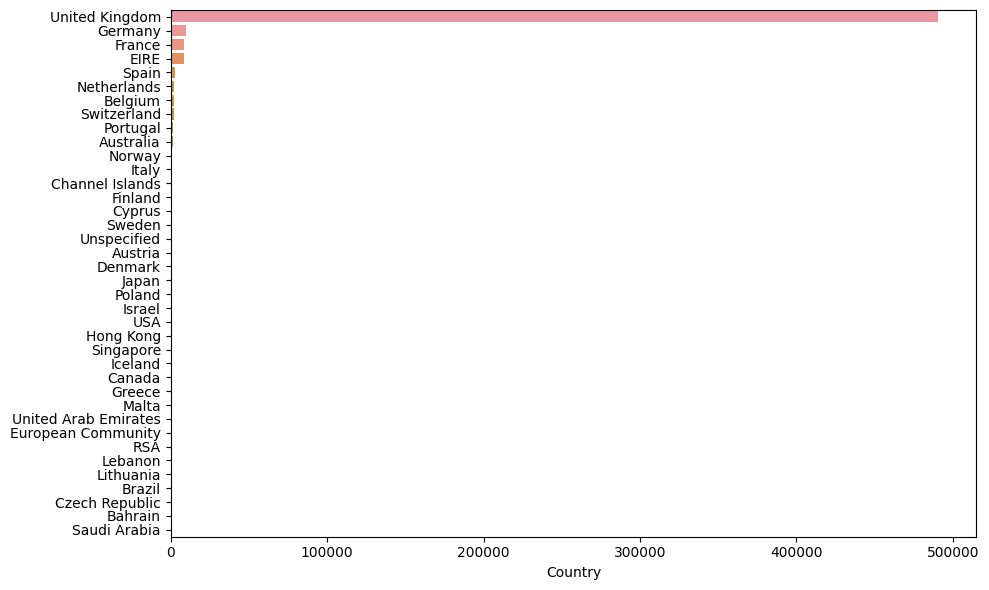

In [ ]:
# counting orders from each countries
val=df.Country.value_counts()
print((val/len(df2)*100))

# setting up figure size
plt.figure(figsize=(10,6))

# plotting count of country-wise purchases
sns.barplot(x=val, y=val.index)
plt.tight_layout()

- 91.36% purchases were made from United Kingdom.

In [ ]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom


In [ ]:
# creating a total price column
df2['total-price']=df2['UnitPrice'] * df2['Quantity']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,total-price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom,20.34


In [ ]:
# grouping by invoice to see the amount of purchases made at individual invoice level
inv=df2.groupby('InvoiceNo')['total-price'].sum().sort_values(ascending=False).reset_index()
inv[inv['total-price']!=0.00]

,InvoiceNo,total-price
0,581483,168469.60
1,541431,77183.60
2,574941,52940.94
3,576365,50653.91
4,556444,38970.00
...,...,...
19955,573589,0.55
19956,542736,0.55
19957,539441,0.42
19958,567869,0.40


- Highest amount of purchase was made by the invoice number **581483** and the amount is **$168469.60**

- Lowest amount of purchase was made by the invoice number **570554** and the amount is	**0.38**

- Lowest amount was determined after ignoring all the values where `total-price` had a value of 0.00

In [ ]:
# note to self: make insights like these for other columns